In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
def read_corpus(path):
    
    df_corpus = pd.read_csv(path)

    corpus_dict = {}

    for i in range(len(df_corpus)):

        word = str(df_corpus.word[i])
        count = int(df_corpus.num[i])
        corpus_dict[word] = count

    return corpus_dict

In [3]:
def filter_words(report0):
    
    report = []
    
    for i in range(len(report0)):
        
        if(report0[i] not in report):
            if(len(report0[i])>=2 and len(report0[i])<=8):
                report.append(report0[i])
    
    return report

In [4]:
def update_corpus(report,corpus_dict):
    
    corpus_list = list(corpus_dict.keys())
    
    for i in range(len(report)):
        
        report_word = report[i]
        if(report_word in corpus_list):
            corpus_dict[report_word] = corpus_dict[report_word]+1
        else:
            corpus_dict[report_word] = 1
    
    return corpus_dict

In [5]:
def save_corpus(corpus_dict):
    
    corpus_save = []
    
    corpus_list = list(corpus_dict.keys())
    
    for i in range(len(corpus_list)):
        
        one_word = {}
        one_word['word'] = corpus_list[i]
        one_word['num'] = corpus_dict[corpus_list[i]]
        corpus_save.append(one_word)
    
    corpus_save = pd.DataFrame(corpus_save)
    
    return corpus_save

In [10]:
def build_corpus(filename,t1,t2):
    
    df_hs300 = pd.read_csv('data/HS300/' + filename + '.csv')
    stock_code = list(df_hs300['成份代码'])
    foldername = t1+'-'+t2

    for i in range(len(stock_code)):
        
        corpus_dict = read_corpus('data/HS300/' + foldername + '/corpus2.csv')  # 读入预设语料库
        
        one_stock_code = stock_code[i]
        savefilepath = 'data/HS300/' + foldername + '/'+ one_stock_code+'.csv'
        df = pd.read_csv(savefilepath)
        df = df.dropna()
        df = df.reset_index(drop=True)
        
        for j in range(len(df)):
    
            report0 = list(df.words[j].split("/"))
            report = filter_words(report0)
            corpus_dict = update_corpus(report,corpus_dict)  # 更新预设语料库
        
        corpus_df = save_corpus(corpus_dict)
        
        if(i%50==0):
            print(i)
            print(len(corpus_df))
        
        corpus_df.to_csv('data/HS300/' + foldername + '/corpus2.csv', index=False, encoding='utf_8_sig')

In [13]:
def remove_low_frequency(filename,t1,t2):
    
    foldername = t1+'-'+t2
    filepath = 'data/HS300/' + foldername + '/corpus2.csv'
    
    df_corpus = pd.read_csv(filepath)
    print(len(df_corpus))
    
    df_corpus.drop(df_corpus.loc[df_corpus['num']<=65].index, inplace=True)  # remove num ≤ 65
    df_corpus = df_corpus.reset_index(drop=True)
    print(len(df_corpus))
    
    df_corpus.to_csv(filepath, index=False, encoding='utf_8_sig')

In [29]:
# build_corpus('2015-12-30','20151230','20160613')
# build_corpus('2016-06-13','20160613','20161212')

# build_corpus('2016-12-12','20161212','20170612')
# build_corpus('2017-06-12','20170612','20171211')

# build_corpus('2017-12-11','20171211','20180611')
# build_corpus('2018-06-11','20180611','20181217')

# build_corpus('2018-12-17' ,'20181217','20190617')
# build_corpus('2019-06-17','20190617','20191216')

# build_corpus('2019-12-16','20191216','20200615')
build_corpus('2020-06-15','20200615','20201214')

0
13563
50
81573
100
114390
150
130553
200
151223
250
171951


In [30]:
# remove_low_frequency('2016-06-13','20160613','20161212')

# remove_low_frequency('2016-12-12','20161212','20170612')
# remove_low_frequency('2017-06-12','20170612','20171211')

# remove_low_frequency('2017-12-11','20171211','20180611')
# remove_low_frequency('2018-06-11','20180611','20181217')

# remove_low_frequency('2018-12-17' ,'20181217','20190617')
# remove_low_frequency('2019-06-17','20190617','20191216')

# remove_low_frequency('2019-12-16','20191216','20200615')
remove_low_frequency('2020-06-15','20200615','20201214')

187425
11341


In [9]:
df_corpus = pd.read_csv("data/HS300/20151230-20160613/corpus.csv")
df_corpus[0:100]

,word,num
0,核心技术,579
1,推广,1081
2,增值,1174
3,领先,1243
4,贴现,701
...,...,...
95,弥补,1067
96,资产重组,2556
97,坏账,546
98,立案,401


In [10]:
len(df_corpus)

262525

In [11]:
from statistics import mean, median

num_list = list(df_corpus['num'])
len(num_list)

262525

In [12]:
max(num_list)

17175

In [13]:
min(num_list)

0

In [14]:
mean(num_list)

29.91701361775069

In [15]:
median(num_list)

2

In [17]:
for i in range(200):
    
    print(str(df_corpus.word[i]) + " " + str(df_corpus.num[i]))

核心技术 579
推广 1081
增值 1174
领先 1243
贴现 701
考核 2198
获授 471
绩效 827
新兴 848
折现 790
动力 1150
有效性 1679
健全 1476
适用 0
自有 1388
超募 554
广泛 0
合规 2286
资助 840
团队 1519
派息 829
优秀 904
着力 776
溢价 759
定制 444
通过 0
预先 809
高端 1004
创造 1366
创业 543
成就 398
改进 1163
引领 679
稳步 1029
引进 988
试行 1113
差异化 658
扶贫 175
派发 1244
驱动 749
一流 699
现金管理 539
首个 456
国际化 878
技术骨干 98
最佳 992
安全性 771
精准 368
关键 1275
幸福 251
股息 690
成果 2463
履约 700
改造 1290
还本付息 697
净亏损 900
无限 1654
除息 103
付息 1259
下跌 967
融券 1088
减值 1242
无偿 997
解散 417
摊薄 698
不可 0
享受 1381
不利 1767
筹划 805
未能 2267
下滑 838
债权 1471
遭受 972
不足 0
下降 2239
赔付 562
支付现金 1080
利息支出 1365
放弃 1449
偿还债务 1272
更名 893
平稳 838
卖出 675
拆出 160
侵占 362
只能 1146
兑付 1252
放缓 889
返还 1311
停牌 872
流出 1347
商誉 1207
违约 1235
亏损 2050
出售 2227
弥补 1067
资产重组 2556
坏账 546
立案 401
购回 1054
补偿 1522
证券 12889
代码 10918
公告 13438
编号 10847
优先股 2236
平银优 12
股份有限公司 13360
年度 9675
权益 3704
分派 962
实施 7214
公司 17175
董事会 15894
全体成员 5296
保证 14392
信息 9849
披露 11336
内容 14579
真实 9837
准确 9152
完整 9742
虚假 12443
记载 12482
误导性 12261
陈述 12746
遗漏 12533
方案 5317
已

In [18]:
# remove num = 1

df_corpus.drop(df_corpus.loc[df_corpus['num']==1].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

151599

In [19]:
num_list = list(df_corpus['num'])
mean(num_list)

51.07578546032626

In [20]:
median(num_list)

4

In [21]:
# remove num = 2

df_corpus.drop(df_corpus.loc[df_corpus['num']==2].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

107389

In [22]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

71.27934890910615
7


In [23]:
# remove num = 3

df_corpus.drop(df_corpus.loc[df_corpus['num']==3].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

85980

In [24]:
# remove num = 4

df_corpus.drop(df_corpus.loc[df_corpus['num']==4].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

72313

In [25]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

104.20979630218633
13


In [26]:
# remove num = 5

df_corpus.drop(df_corpus.loc[df_corpus['num']==5].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

63498

In [27]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

117.98242464329586
15.0


In [29]:
# remove num = 6

df_corpus.drop(df_corpus.loc[df_corpus['num']==6].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

56456

In [30]:
# remove num = 7

df_corpus.drop(df_corpus.loc[df_corpus['num']==7].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

51185

In [31]:
for i in range(300):
    
    print(str(df_corpus.word[i]) + " " + str(df_corpus.num[i]))

核心技术 579
推广 1081
增值 1174
领先 1243
贴现 701
考核 2198
获授 471
绩效 827
新兴 848
折现 790
动力 1150
有效性 1679
健全 1476
适用 0
自有 1388
超募 554
广泛 0
合规 2286
资助 840
团队 1519
派息 829
优秀 904
着力 776
溢价 759
定制 444
通过 0
预先 809
高端 1004
创造 1366
创业 543
成就 398
改进 1163
引领 679
稳步 1029
引进 988
试行 1113
差异化 658
扶贫 175
派发 1244
驱动 749
一流 699
现金管理 539
首个 456
国际化 878
技术骨干 98
最佳 992
安全性 771
精准 368
关键 1275
幸福 251
股息 690
成果 2463
履约 700
改造 1290
还本付息 697
净亏损 900
无限 1654
除息 103
付息 1259
下跌 967
融券 1088
减值 1242
无偿 997
解散 417
摊薄 698
不可 0
享受 1381
不利 1767
筹划 805
未能 2267
下滑 838
债权 1471
遭受 972
不足 0
下降 2239
赔付 562
支付现金 1080
利息支出 1365
放弃 1449
偿还债务 1272
更名 893
平稳 838
卖出 675
拆出 160
侵占 362
只能 1146
兑付 1252
放缓 889
返还 1311
停牌 872
流出 1347
商誉 1207
违约 1235
亏损 2050
出售 2227
弥补 1067
资产重组 2556
坏账 546
立案 401
购回 1054
补偿 1522
证券 12889
代码 10918
公告 13438
编号 10847
优先股 2236
平银优 12
股份有限公司 13360
年度 9675
权益 3704
分派 962
实施 7214
公司 17175
董事会 15894
全体成员 5296
保证 14392
信息 9849
披露 11336
内容 14579
真实 9837
准确 9152
完整 9742
虚假 12443
记载 12482
误导性 12261
陈述 12746
遗漏 12533
方案 5317
已

144.81779818306146
22


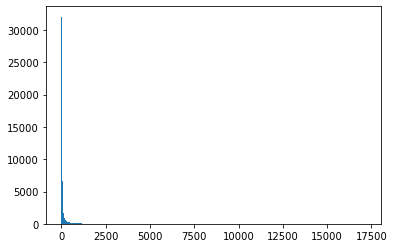

In [40]:
from matplotlib import pyplot as plt

num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

plt.hist(num_list,500)

plt.show()

In [41]:
# remove num ≤ 65

df_corpus.drop(df_corpus.loc[df_corpus['num']<=65].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

12887

In [42]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

513.8556685031427
189


In [43]:
for i in range(300):
    
    print(str(df_corpus.word[i]) + " " + str(df_corpus.num[i]))

核心技术 579
推广 1081
增值 1174
领先 1243
贴现 701
考核 2198
获授 471
绩效 827
新兴 848
折现 790
动力 1150
有效性 1679
健全 1476
自有 1388
超募 554
合规 2286
资助 840
团队 1519
派息 829
优秀 904
着力 776
溢价 759
定制 444
预先 809
高端 1004
创造 1366
创业 543
成就 398
改进 1163
引领 679
稳步 1029
引进 988
试行 1113
差异化 658
扶贫 175
派发 1244
驱动 749
一流 699
现金管理 539
首个 456
国际化 878
技术骨干 98
最佳 992
安全性 771
精准 368
关键 1275
幸福 251
股息 690
成果 2463
履约 700
改造 1290
还本付息 697
净亏损 900
无限 1654
除息 103
付息 1259
下跌 967
融券 1088
减值 1242
无偿 997
解散 417
摊薄 698
享受 1381
不利 1767
筹划 805
未能 2267
下滑 838
债权 1471
遭受 972
下降 2239
赔付 562
支付现金 1080
利息支出 1365
放弃 1449
偿还债务 1272
更名 893
平稳 838
卖出 675
拆出 160
侵占 362
只能 1146
兑付 1252
放缓 889
返还 1311
停牌 872
流出 1347
商誉 1207
违约 1235
亏损 2050
出售 2227
弥补 1067
资产重组 2556
坏账 546
立案 401
购回 1054
补偿 1522
证券 12889
代码 10918
公告 13438
编号 10847
优先股 2236
股份有限公司 13360
年度 9675
权益 3704
分派 962
实施 7214
公司 17175
董事会 15894
全体成员 5296
保证 14392
信息 9849
披露 11336
内容 14579
真实 9837
准确 9152
完整 9742
虚假 12443
记载 12482
误导性 12261
陈述 12746
遗漏 12533
方案 5317
已获 248
年度股东大会 3902
审议 11494
现将 18

In [ ]:
def count_report_num(filename,t1,t2):
    
    num = 0
    
    df_hs300 = pd.read_csv('data/HS300/' + filename + '.csv')
    stock_code = list(df_hs300['成份代码'])
    foldername = t1+'-'+t2

    for i in range(len(stock_code)):
        
       
        one_stock_code = stock_code[i]
        savefilepath = 'data/HS300/' + foldername + '/'+ one_stock_code+'.csv'
        df = pd.read_csv(savefilepath)
        df = df.dropna()
        df = df.reset_index(drop=True)